# Optimize Advertizing Strategies with Thompson Sampling

#### Imports:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Simulate the Success of Advertising Strategies:

Assign 1 for successfully attracting a customer, 0 if ineffective.

In [2]:
# Define the number of potential customers and advertizing strategies.
num_viewers = 10000
num_strategies = 9

In [7]:
# Assign a random customer converstion rate for each ad strategy
conversion_rates = np.random.RandomState(222).uniform(low=0, high=1, size=num_strategies)
print('Conversion Rates: ', '\n', conversion_rates)

# Create empty matrix X
X = np.array(np.zeros([num_viewers,num_strategies]))

# Simulate adverising success for each potential customer
for i in range(num_viewers):
    for j in range(num_strategies):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

Conversion Rates:  
 [0.52602843 0.68531719 0.83567419 0.65376526 0.03702195 0.18015566
 0.76056942 0.22430462 0.73513507]


### Thompson Sampling AI Algorithm:
We are also going to implement a strategy of randomly choosing Ads to compare performance with Thompson Sampling.

Initialize variables to be used in algorithm:

In [ ]:
strategies_rand = []
strategies_tom = []
total_reward_rand = 0
total_reward_tom = 0

total_reward_bs = 0

num_success = [0] * num_strategies
num_fail = [0] * num_strategies

rewards_strategies = [0] * num_strategies
regret = []

In [8]:
for n in range(0, num_viewers):

    # Random Strategy Selection
    strategy_rs = random.randrange(num_strategies)
    strategies_rand.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rand = total_reward_rand + reward_rs

    # Thompson Sampling
    strategy_ts = 0
    max_random = 0

    # Loop through each strategy
    for i in range(0, num_strategies):
        
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
                                         numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
            
    reward_ts = X[n, strategy_ts]
    
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
        
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts

    # Best Strategy
    for i in range(0, num_strategies):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)

    # Regret
    regret.append(total_reward_bs - total_reward_ts)

# Computing the Absolute and Relative Return
absolute_return = total_reward_ts - total_reward_rs
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Absolute Return: {:.0f} $".format(absolute_return))
print("Relative Return: {:.0f} %".format(relative_return))

Absolute Return: 3190 $
Relative Return: 62 %


### Plot Regret Curve:

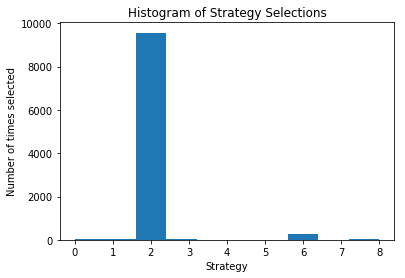

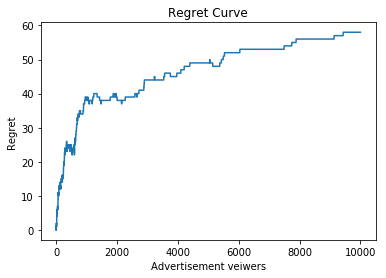

In [9]:
# Plotting the Histogram of Strategy Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Strategy Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times selected')
plt.show()
plt.close()

# Plotting the Regret Curve
plt.plot(regret)
plt.title('Regret Curve')
plt.xlabel('Advertisement veiwers')
plt.ylabel('Regret')
plt.show()

### Done!

<hr>